## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import re

In [2]:
#sns.set_theme("darkgrid")
sns.set_theme()

# Plotting training curve with confidence interval

## Prepare data

In [3]:
def load_data_files(data_dir):
    data = None
    for file in os.listdir(data_dir):
        run = pd.read_csv(os.path.join(data_dir, file))
        if data is None:
            data = run
        else:
            data = data.append(run, ignore_index=True)
    return data

## Plot

The `ci` parameter changes the shaded area definition:
 - integer value gives the confidence interval at that interval (default: 95)
 - "sd" gives the standard deviation

In [47]:
def plot_runs(runs, ci="sd", ax=None, ax_xlabel=None, ax_ylabel=None, ylim=None, names=None, colors=None, loc='best'):
    if type(runs) is list:
        runs = pd.concat(runs, ignore_index=True)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 8))
    if ylim is not None:
        ax.set(ylim=ylim, xlabel=ax_xlabel, ylabel=ax_ylabel)
    sns.lineplot(data=runs, x="Step", y="Value", hue="Name", ax=ax, ci=ci, palette=colors)
    if names is not None:
        ax.legend(names, loc=loc)
    else:
        ax.legend(loc=loc)

def load_and_plot(model_runs_dir):
    # Load runs
    runs = dict()
    for run_dir in os.listdir(model_runs_dir):
        run = load_data_files(os.path.join(model_runs_dir, run_dir))
        run["Name"] = run_dir
        # Print info
        nb_runs = run.shape[0] / 1000
        last_step = run.iloc[-1]["Step"]
        final_mean_reward = run.query(f"Step == {last_step}")["Value"].mean()
        final_std = run.query(f"Step == {last_step}")["Value"].std()
        print(f'Run {run_dir} with {nb_runs} runs, final mean episode reward = {final_mean_reward}, final std = {final_std}.')
        # Add to list
        runs[run_dir] = run
    # Aggregate and plot
    plot_runs(list(runs.values()))
    return runs

Run h4_nev8_tanh_init1_run100_109 with 10.0 runs, final mean episode reward = -160.7808410644531, final std = 25.93411906651465.
Run h4_nev8_run30_39 with 10.0 runs, final mean episode reward = -177.94925994873046, final std = 17.194163523991087.
Run h8_nev8_run50_59 with 10.0 runs, final mean episode reward = -170.48688812255858, final std = 8.306868110519986.
Run h4_nev16_run40_49 with 10.0 runs, final mean episode reward = -163.2858093261719, final std = 11.433418025399977.
Run h4_nev16_tanh_run80_89 with 10.0 runs, final mean episode reward = -161.04940643310547, final std = 11.786281125272975.
Run h4_nev8_tanh_run65_74 with 10.0 runs, final mean episode reward = -163.4786407470703, final std = 20.07469159454208.
Run h4_nev8_tanh_init5_run90_99 with 10.0 runs, final mean episode reward = -168.1171646118164, final std = 15.130288270799348.


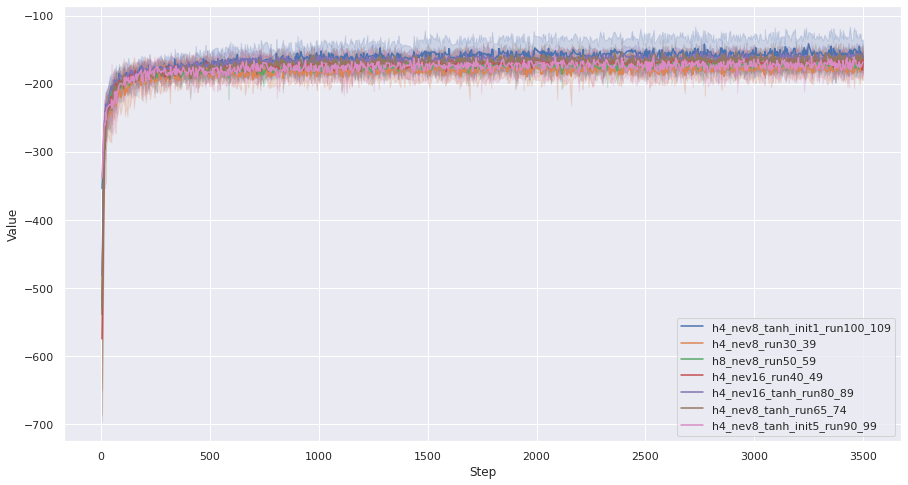

In [48]:
cmaes_runs = load_and_plot("data/cmaes/")

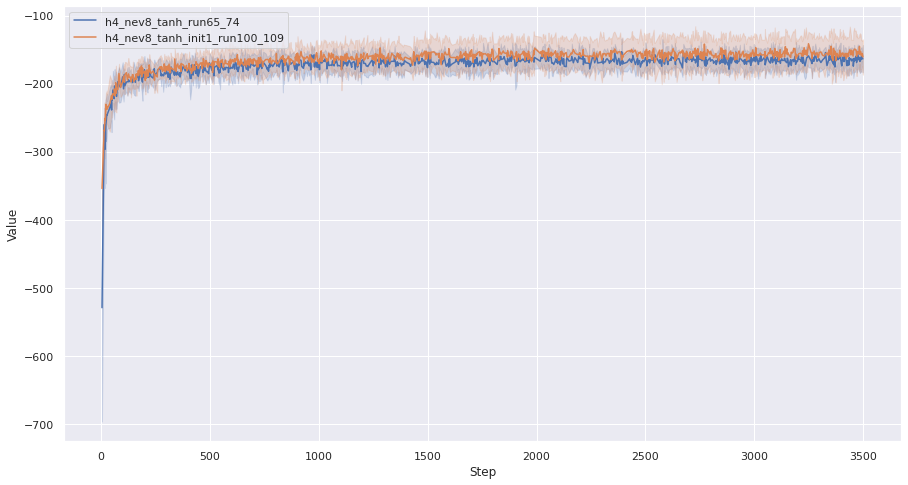

In [36]:
plot_runs([cmaes_runs["h4_nev8_tanh_run65_74"],cmaes_runs["h4_nev8_tanh_init1_run100_109"]])

Run 2addpg_fo_abs_cont_dr_run45_54 with 10.0 runs, final mean episode reward = -139.7624969482422, final std = 34.26023519617733.


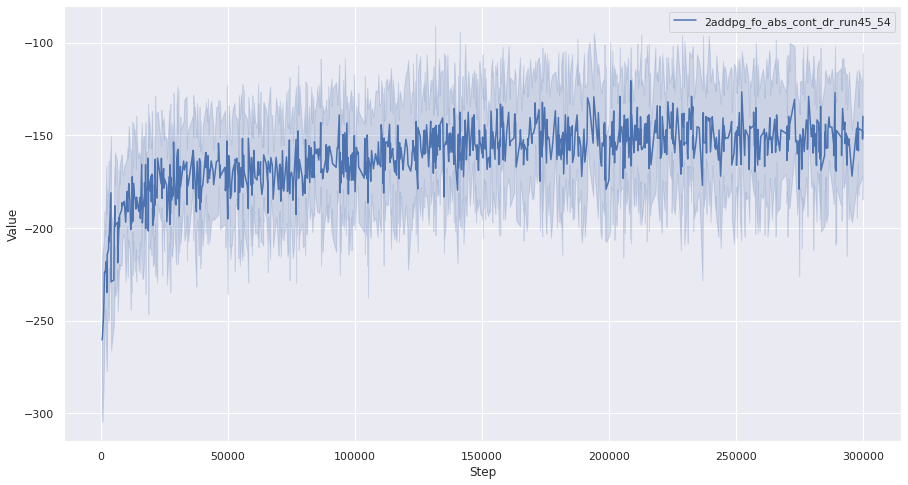

In [49]:
maddpg_runs = load_and_plot("data/maddpg/")

Run qmix_fo_abs_disc_dr_run10_19 with 10.0 runs, final mean episode reward = -149.57798690795897, final std = 35.625042889670276.


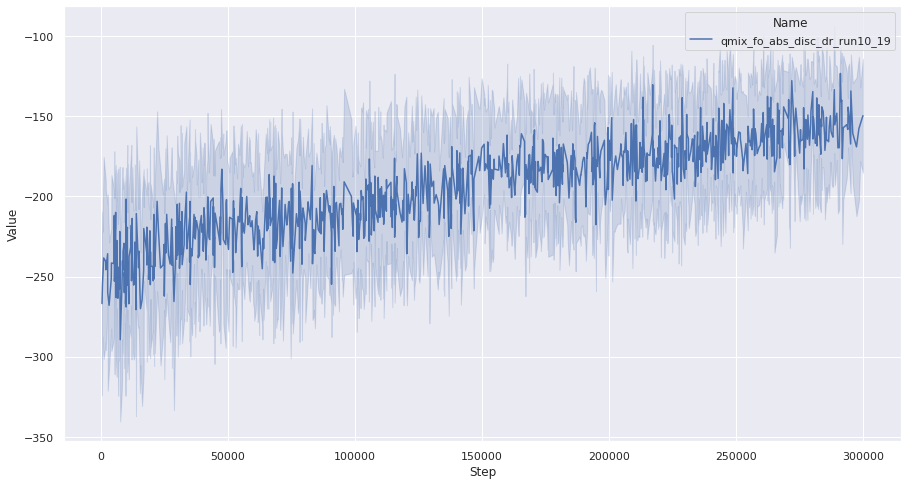

In [17]:
qmix_runs = load_and_plot("data/qmix/")

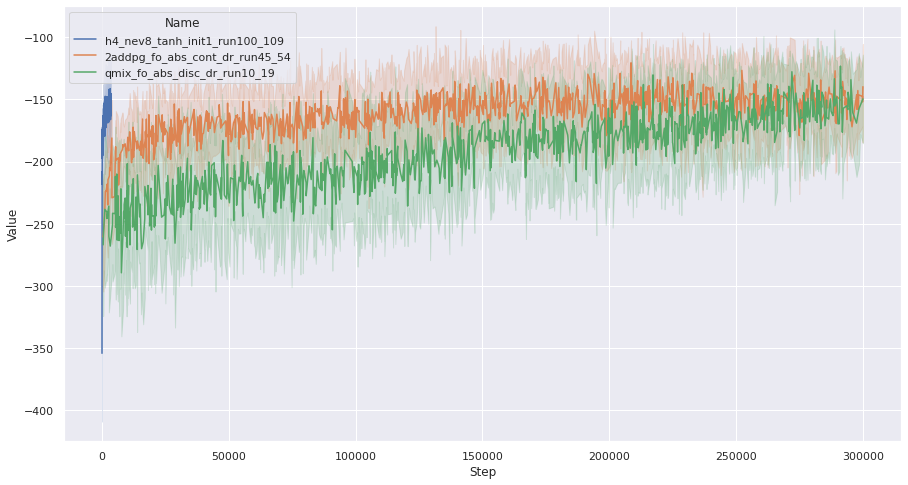

In [18]:
plot_runs([
    cmaes_runs["h4_nev8_tanh_init1_run100_109"],
    maddpg_runs["2addpg_fo_abs_cont_dr_run45_54"],
    qmix_runs["qmix_fo_abs_disc_dr_run10_19"]
])

In [66]:
qmix_runs["qmix_fo_abs_disc_dr_run10_19"]["Step"] = [i * 150 for n in range(10) for i in range(1, 1001)]

In [69]:
maddpg_runs["2addpg_fo_abs_cont_dr_run45_54"]["Step"] = [i * 150 for n in range(10) for i in range(1, 1001)]

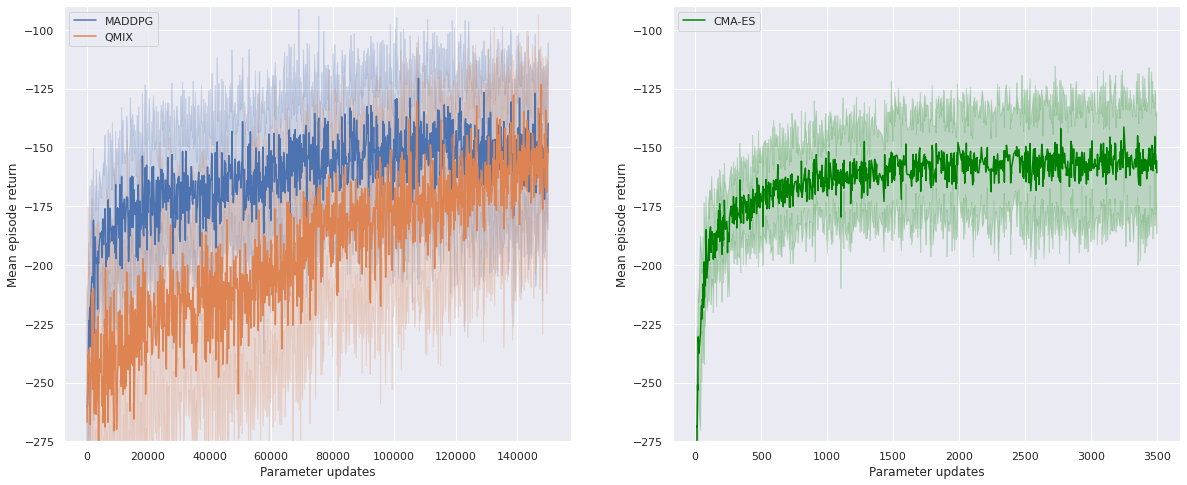

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ylim = (-275, -90)
plot_runs([maddpg_runs["2addpg_fo_abs_cont_dr_run45_54"], qmix_runs["qmix_fo_abs_disc_dr_run10_19"]], 
            ax=ax1, ylim=ylim, names=['MADDPG', 'QMIX'], loc='upper left', ax_xlabel='Parameter updates', 
            ax_ylabel='Mean episode return')
plot_runs([cmaes_runs["h4_nev8_tanh_init1_run100_109"]], ax=ax2, ylim=ylim, names=['CMA-ES'], 
            loc='upper left', colors=['green'], ax_xlabel='Parameter updates', 
            ax_ylabel='Mean episode return')